<a href="https://colab.research.google.com/github/nerumur/Valeria/blob/main/exam_20_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Задача 1

'''
Тема: Регулярные выражения
Описание: Напишите программу, которая находит все числа в заданной строке и выводит их в порядке по убыванию (тип вывода -- целое число).
Пример:
Входные данные: "abc123def456"
Ожидаемый вывод: 654321
'''

import re

def find_reverse_digits(string):
    digits = re.findall(r'\d', string)                # ищем все цифры
    sorted_digits = sorted(digits, reverse=True)      # сортируем все цифры в порядке убывания
    sorted_number_str = ''.join(sorted_digits)        # объединяем цифры строку
    sorted_number = int(sorted_number_str)            # делаем целым числом
    return sorted_number

find_reverse_digits('abc123def456')

654321

In [81]:
def test_find_reverse_digits():
    score = 0
    assert find_reverse_digits("abc123def456") == 654321
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_reverse_digits("hello12world34") == 4321
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_reverse_digits("123abc456def") == 654321
    score += 1
    print(f'Пройден тест {score} / 5')
    try:
      assert find_reverse_digits("no numbers here")
    except ValueError:
      pass
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_reverse_digits("12345") == 54321
    score += 1
    print(f'Пройден тест {score} / 5')

test_find_reverse_digits()

Пройден тест 1 / 5
Пройден тест 2 / 5
Пройден тест 3 / 5
Пройден тест 4 / 5
Пройден тест 5 / 5


In [82]:
# Задача 2

'''
Тема: Spacy
Описание: Используйте библиотеку Spacy, чтобы найти все существительные в заданном тексте (тип вывода -- список строк).
Пример:
Входные данные: "Apple is a fruit."
Ожидаемый вывод: ["Apple", "fruit"]
'''

import spacy
nlp = spacy.load("en_core_web_sm")

def find_nouns(text):
    doc = nlp(text)                                                                     # приводим к нужному формату
    nouns = [token.text for token in doc if token.pos_ in ["NOUN", "PROPN"]]            # ищем существительные и имена собственные
    return nouns

find_nouns("Apple is a fruit.")

['Apple', 'fruit']

In [83]:
def test_find_nouns():
    score = 0
    assert find_nouns("apple is a fruit") == ["apple", "fruit"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_nouns("Never gonna give you up. Never gonna let you down. Never gonna run around and desert you!") == []
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_nouns("A cat is on the mat.") == ["cat", "mat"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_nouns("Spacy is a great library") == ["Spacy", "library"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_nouns("I have a book and a pen.") == ["book", "pen"]
    score += 1
    print(f'Пройден тест {score} / 5')

test_find_nouns()

Пройден тест 1 / 5
Пройден тест 2 / 5
Пройден тест 3 / 5
Пройден тест 4 / 5
Пройден тест 5 / 5


In [88]:
# Задача 4

'''
Тема: Токенизация
Описание: Напишите программу, которая удаляет все символы кроме букв и цифр из текста, приводит всё к нижнему регистру
и разбивает заданный текст на слова (тип вывода -- список строк).
Пример:
Входные данные: ""This is @ a sample_ text."
Ожидаемый вывод: ["this", "is", "a", "sample", "text"]
'''

import re

def preprocess_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()      # удаляем все, кроме букв и цифр + приводим к нижнему регистру
    words = cleaned_text.split()                                    # делим на слова по пробелу
    return words

preprocess_text("This is @ a sample_ text.")


['this', 'is', 'a', 'sample', 'text']

In [89]:
def test_preprocess_text():
    score = 0
    assert preprocess_text("Hello, World! 123") == ["hello", "world", "123"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert preprocess_text("No punctuation here") == ["no", "punctuation", "here"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert preprocess_text("   Whitespace   ") == ["whitespace"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert preprocess_text("Special characters @#$%^&*()") == ["special", "characters"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert preprocess_text("12345") == ["12345"]
    score += 1
    print(f'Пройден тест {score} / 5')

test_preprocess_text()

Пройден тест 1 / 5
Пройден тест 2 / 5
Пройден тест 3 / 5
Пройден тест 4 / 5
Пройден тест 5 / 5


In [94]:
# Задача 5

'''
Тема: Разметка именованных сущностей
Описание: Напишите программу, которая выполняет разметку именованных сущностей с помощью Spacy
и записывает результат в DataFrame с помощью pandas (тип вывода -- датафрейм).
'''

import spacy
import pandas as pd

def entity_annotation(text):
    doc = nlp(text)
    entities = []                               # cписок для хранения результатов
    for ent in doc.ents:
      entities.append({'text': ent.text, 'label': ent.label_})
    df = pd.DataFrame(entities)                 # датафрейм с результатами
    return df

entity_annotation("The Eiffel Tower is located in Paris, France.")

,text,label
0,The Eiffel Tower,FAC
1,Paris,GPE
2,France,GPE


In [95]:
def test_entity_annotation():
    score = 0
    text = "The Eiffel Tower is located in Paris, France."
    expected_df = pd.DataFrame({
        'text': ['The Eiffel Tower', 'Paris', 'France'],
        'label': ['FAC', 'GPE', 'GPE'],
    })
    assert entity_annotation(text).equals(expected_df)
    score += 1
    print(f'Пройден тест {score} / 5')
    assert entity_annotation("").empty
    score += 1
    print(f'Пройден тест {score} / 5')
    assert entity_annotation("This is a sample text.").empty
    score += 1
    print(f'Пройден тест {score} / 5')
    text = "I was born in 1990."
    expected_df = pd.DataFrame({
        'text': ['1990'],
        'label': ['DATE'],
    })
    assert entity_annotation(text).equals(expected_df)
    score += 1
    print(f'Пройден тест {score} / 5')
    text = "The movie 'Inception' was directed by Christopher Nolan."
    expected_df = pd.DataFrame({
        'text': ['Christopher Nolan'],
        'label': ['PERSON'],
    })
    assert entity_annotation(text).equals(expected_df)
    score += 1
    print(f'Пройден тест {score} / 5')

test_entity_annotation()

Пройден тест 1 / 5
Пройден тест 2 / 5
Пройден тест 3 / 5
Пройден тест 4 / 5
Пройден тест 5 / 5


In [97]:
# Дополнительная задача

!wget https://raw.githubusercontent.com/orgtre/google-books-ngram-frequency/refs/heads/main/ngrams/2grams_english.csv

--2024-12-20 17:03:42--  https://raw.githubusercontent.com/orgtre/google-books-ngram-frequency/refs/heads/main/ngrams/2grams_english.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89671 (88K) [text/plain]
Saving to: ‘2grams_english.csv’

2grams_english.csv  100%[===================>]  87.57K  --.-KB/s    in 0.02s   

2024-12-20 17:03:42 (3.82 MB/s) - ‘2grams_english.csv’ saved [89671/89671]



In [102]:
# 1. Откройте датасет (название файла 2grams_english.csv) с pandas и выведите первые 5 строк датасета (1 балл)

the_file = pd.read_csv('2grams_english.csv')

# Выводим первые 3 строки
the_file.head(5)

,ngram,freq
0,of the,1746034516
1,in the,1126073086
2,to the,691479125
3,on the,478338333
4,and the,458356999


In [103]:
# 2. С помощью метода iloc сохраните в новую переменную срез датасета с 1000 по 1050 строки;
# выведите хвостик (последние 5 строк) нового датасета (1 балл)

piece_of_the_file = the_file.iloc[1000:1051]
print(piece_of_the_file.tail(5))

         ngram      freq
1046  for more  11722920
1047   no more  11722316
1048   loss of  11715807
1049  for your  11700491
1050  the wall  11676236


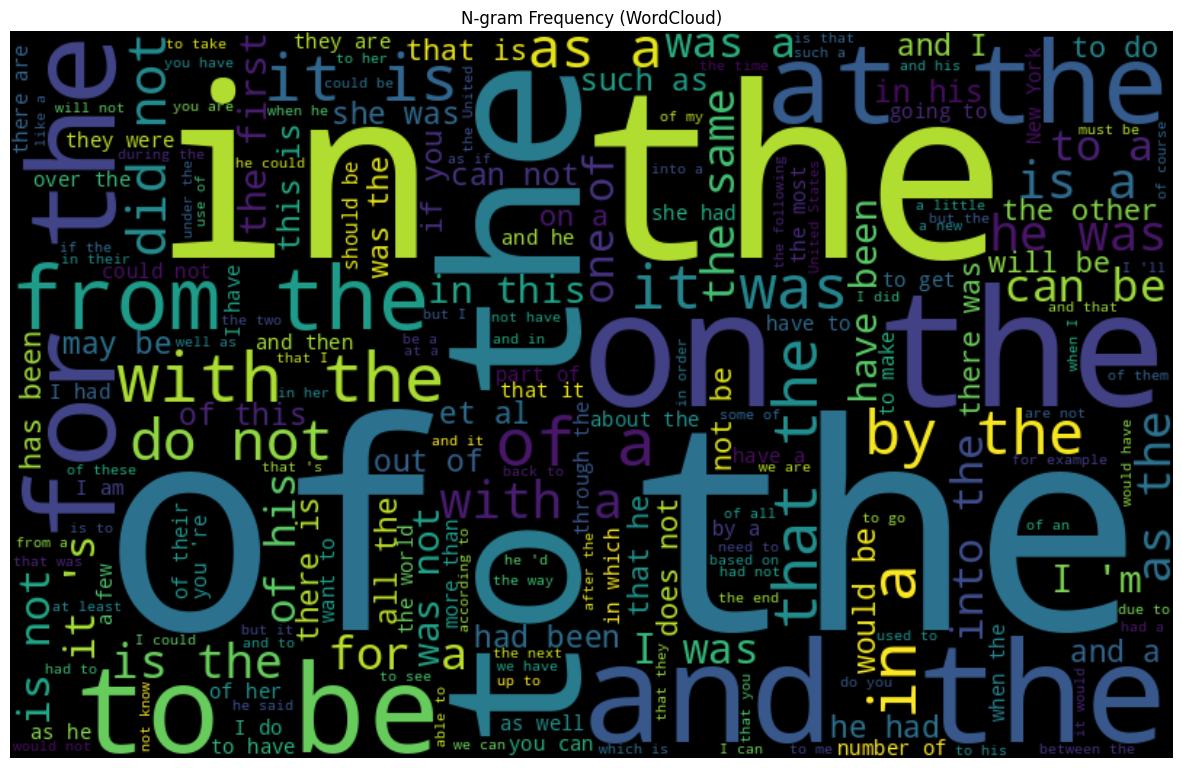

In [109]:
# 3. Создайте облако слов для исходного датасета: допишите код (1 балл)

from matplotlib import pyplot as plt       # Импортируйте matplotlib
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500).generate_from_frequencies(the_file.set_index('ngram')['freq'])

plt.figure(figsize=(15, 10))               # Введите команду matplotlib, чтобы задать размер графика 15 x 10

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.title('N-gram Frequency (WordCloud)')         # Введите команду matplotlib, чтобы добавить заголовок графика "N-gram Frequency (WordCloud)"
plt.show()                                        # Введите команду matplotlib для отображения графика

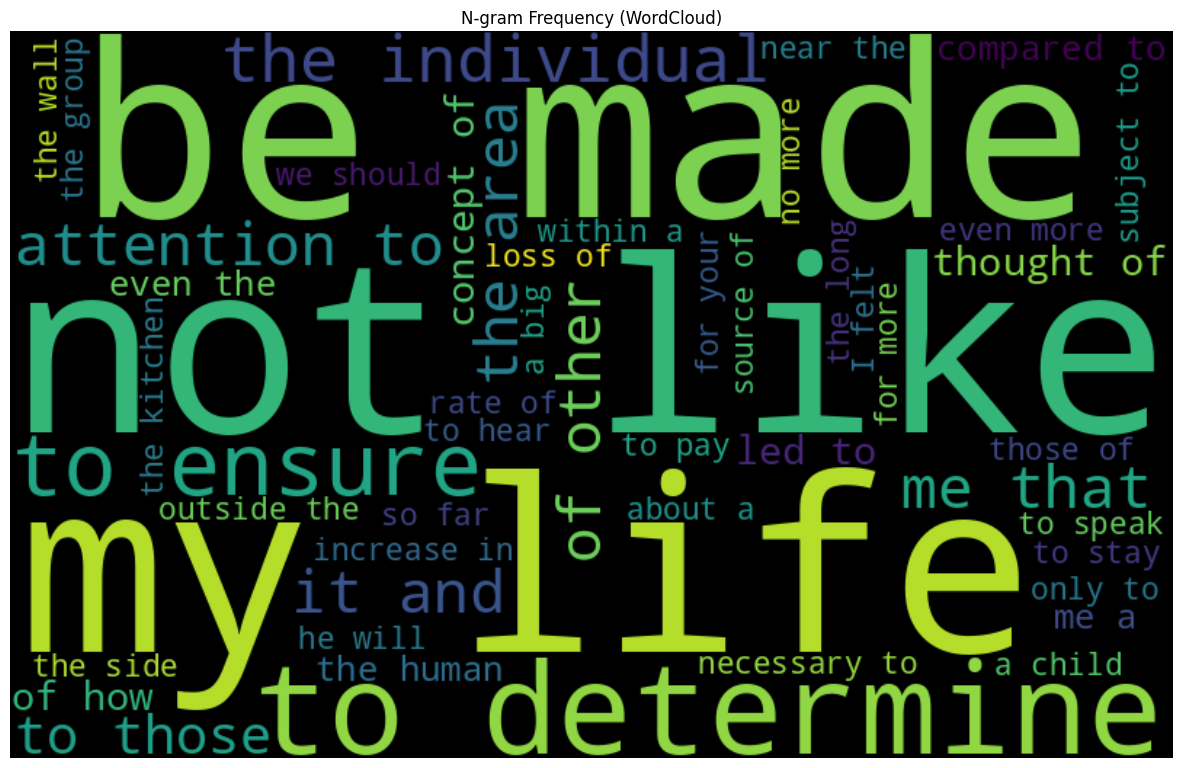

In [108]:
# 4. Создайте облако слов для созданного среза с 1000 по 1050 строки

wordcloud = WordCloud(width=800, height=500).generate_from_frequencies(piece_of_the_file.set_index('ngram')['freq'])

plt.figure(figsize=(15, 10))               # Введите команду matplotlib, чтобы задать размер графика 15 x 10

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.title('N-gram Frequency (WordCloud)')         # Введите команду matplotlib, чтобы добавить заголовок графика "N-gram Frequency (WordCloud)"
plt.show()

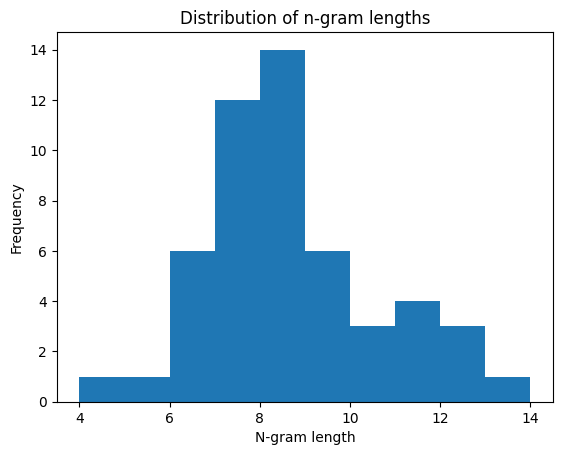

In [110]:
# 5. Создайте гистограмму распределений длин биграм в созданном срезе: допишите код (1 балл)

# Подсчет длины н-грамм
ngram_lengths = piece_of_the_file['ngram'].apply(len)        # примените к столбцу ['ngram'] функцию len через apply

# Построение гистограммы
plt.hist(ngram_lengths)
plt.xlabel('N-gram length')
plt.ylabel('Frequency')
plt.title('Distribution of n-gram lengths')
plt.show()